In [59]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split

Found 3087 files belonging to 7 classes.
Classes: ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']
Number of images in one batch: (32, 224, 224, 3)


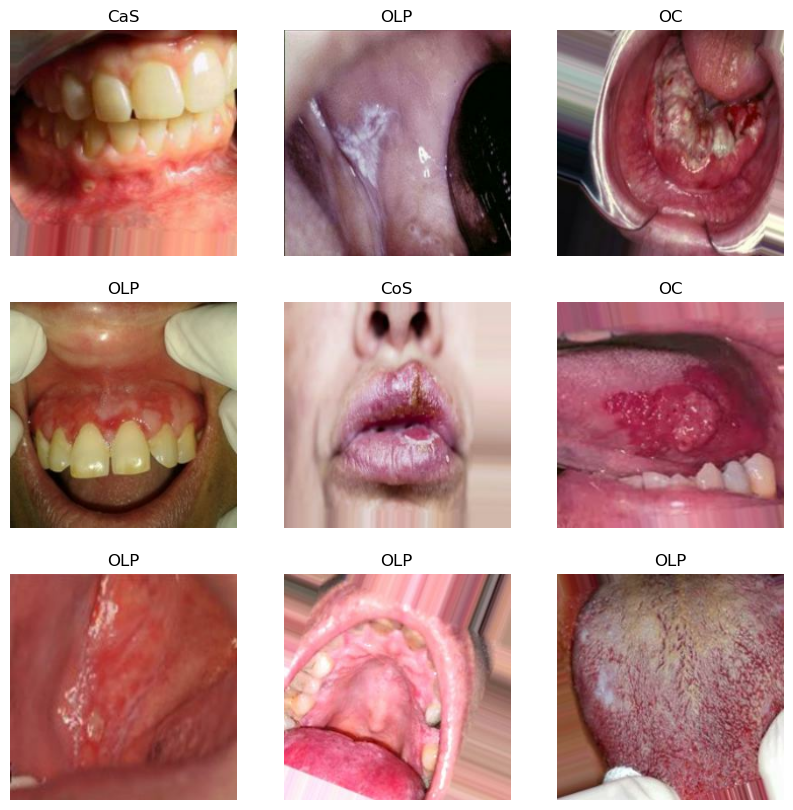

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


data_dir = "Teeth Data one/Teeth DataSet/Teeth_Dataset/Training"

# Load images from the directory
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(224, 224),  
    batch_size=32,  
    shuffle=True  
)

# Display the available classes
print("Classes:", train_data.class_names)

# Test loading some images
for images, labels in train_data.take(1):
    print("Number of images in one batch:", images.shape)

# Get class names
class_names = train_data.class_names

# Get a batch of images and labels
for images, labels in train_data.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9): 
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  
        plt.title(class_names[labels[i]])  
        plt.axis("off")  
    plt.show()


Found 1028 files belonging to 7 classes.
Classes: ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']
Number of images in one batch: (32, 224, 224, 3)


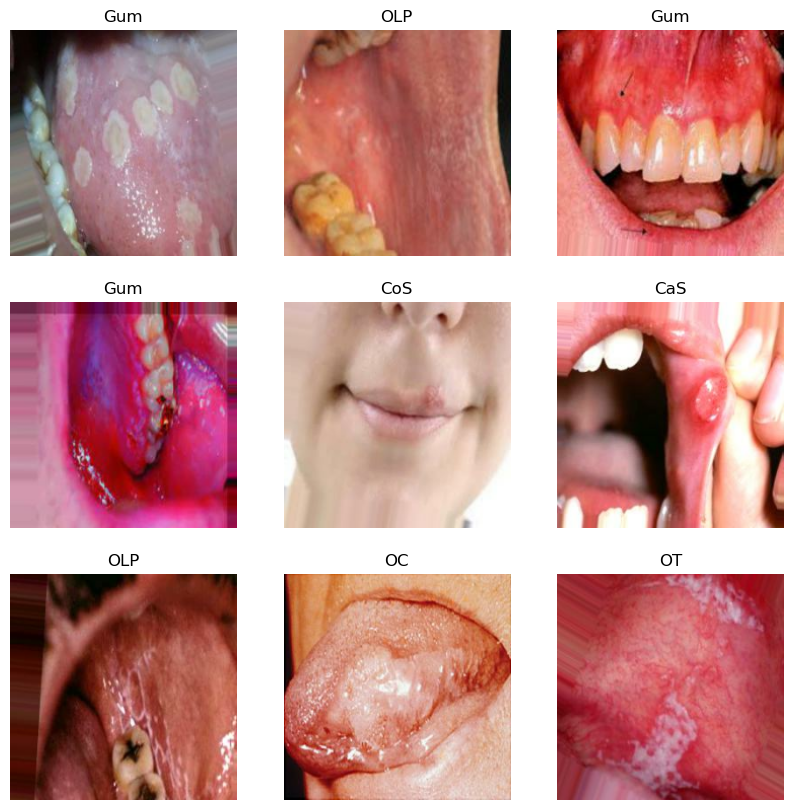

In [65]:
data_dir = "Teeth Data one/Teeth DataSet/Teeth_Dataset/Validation"

# Load images from the directory
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(224, 224),  
    batch_size=32, 
    shuffle=True  
)

# Display the available classes
print("Classes:", val_data.class_names)

# Test loading some images
for images, labels in test_data.take(1):
    print("Number of images in one batch:", images.shape)



class_names = val_data.class_names

# Get a batch of images and labels
for images, labels in val_data.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9): 
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  
        plt.title(class_names[labels[i]])  
        plt.axis("off") 
    plt.show()


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


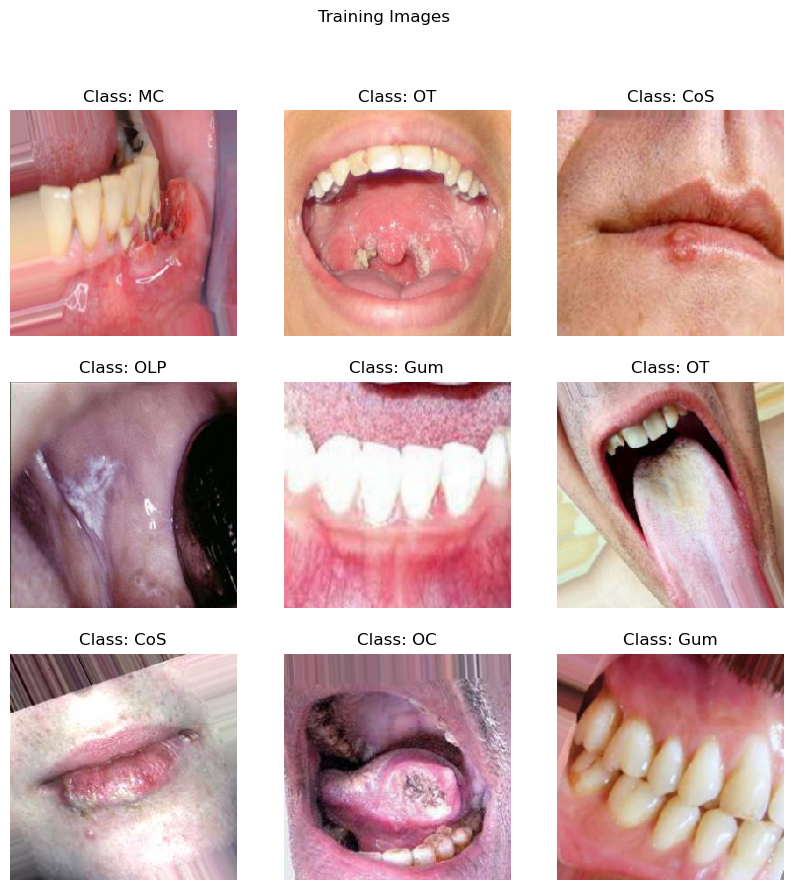

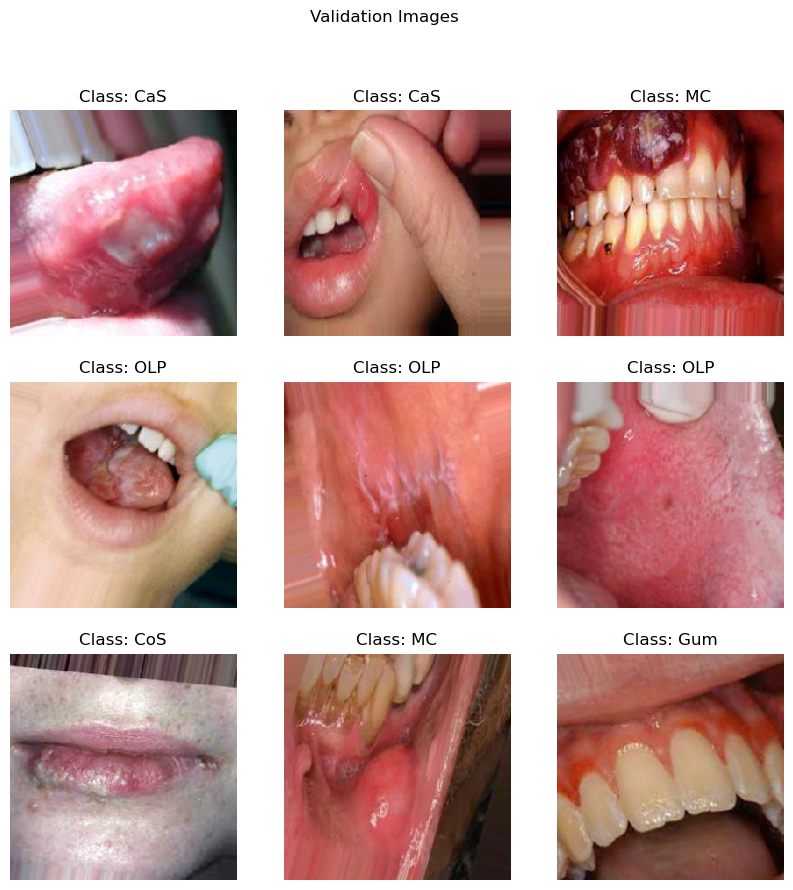

In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Define ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)

# Load dataset (Modify paths accordingly)
train_generator = train_datagen.flow_from_directory(
    'Teeth Data one/Teeth DataSet/Teeth_Dataset/Training', 
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    'Teeth Data one/Teeth DataSet/Teeth_Dataset/Validation', 
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Get class names from the generator
class_names = list(train_generator.class_indices.keys())

# Function to display images
def plot_images(generator, title):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Class: {class_names[np.argmax(labels[i])]}")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()


plot_images(train_generator, "Training Images")


plot_images(val_generator, "Validation Images")


In [71]:
def preprocess(img, label):
    # Convert image to Float32 and normalize to [0,1]
    normalized_img = tf.cast(img, tf.float32) / 255.0
    # This line normalizes an image by converting its pixel values from 0-255 (integer) to 0-1 (float32).
    return normalized_img, label  


def train_data_prep (data,shuffle_size,batch_size):
    data = data.map(preprocess) # Apply the preprocessing function
    data = data.cache() # Cache the dataset in memory/disk to speed up training
    data = data.shuffle(shuffle_size).repeat()  # Shuffle the dataset and repeat it indefinitely
    data = data.batch(batch_size)   # Create batches of size batch_size
    data = data.prefetch(1)  # Prefetch 1 batch to improve performance
    return data



def test_data_prep(data, batch_size):
    data = data.map(preprocess) 
    data = data.cache()  
    data = data.batch(batch_size)  
    data = data.prefetch(1)  
    return data



train_data_prepared = train_data_prep(train_data,1000,32)

test_data_prepared = test_data_prep(test_data, 32)

val_data_prepared = test_data_prep(val_data,32)


input_shape = (224, 224,32)  # Assuming input has 32 channels (or change this to 3 for RGB images)


cifar_cnn = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", input_shape=(224,224,3)),  # Apply 64 filters of size 3x3, with ReLU activation and specify the input shape
    tf.keras.layers.MaxPooling2D(pool_size=2),  
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu"),  
    tf.keras.layers.MaxPooling2D(pool_size=2), 
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation="relu"),  
    tf.keras.layers.MaxPooling2D(pool_size=2),  
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(units=128, activation="relu"),  
    tf.keras.layers.Dense(units=64, activation="relu"), 

    # Output Layer (for multi-class classification)
    tf.keras.layers.Dense(units=10, activation="softmax")  
])




In [73]:
cifar_cnn.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 220, 220, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 110, 110, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 108, 108, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 52, 52, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 26, 26, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 173056)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │      22,151,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,548,618 (86.02 MB)

 Trainable params: 22,548,618 (86.02 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
cifar_cnn.compile(optimizer="adam",
                 loss = "sparse_categorical_crossentropy",
                 metrics= ['accuracy'])

In [83]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

batch_size = 32

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=40
)


Epoch 1/40
96/96 ━━━━━━━━━━━━━━━━━━━━ 58s 583ms/step - accuracy: 0.2049 - loss: 2.5321 - val_accuracy: 0.3584 - val_loss: 1.6509
Epoch 2/40
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 592us/step - accuracy: 0.3438 - loss: 1.7407 - val_accuracy: 0.0000e+00 - val_loss: 1.9365
Epoch 3/40
96/96 ━━━━━━━━━━━━━━━━━━━━ 55s 570ms/step - accuracy: 0.3863 - loss: 1.5759 - val_accuracy: 0.4404 - val_loss: 1.4622
Epoch 4/40
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step - accuracy: 0.3750 - loss: 1.6624 - val_accuracy: 0.5000 - val_loss: 1.2846
Epoch 5/40
96/96 ━━━━━━━━━━━━━━━━━━━━ 55s 575ms/step - accuracy: 0.5704 - loss: 1.2016 - val_accuracy: 0.4639 - val_loss: 1.3921
Epoch 6/40
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 0.6562 - loss: 1.1459 - val_accuracy: 0.5000 - val_loss: 1.0115
Epoch 7/40
96/96 ━━━━━━━━━━━━━━━━━━━━ 55s 571ms/step - accuracy: 0.7047 - loss: 0.8556 - val_accuracy: 0.5371 - val_loss: 1.3572
Epoch 8/40
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 554us/step - accuracy: 0.6250 - loss: 1.0730 - val_accu

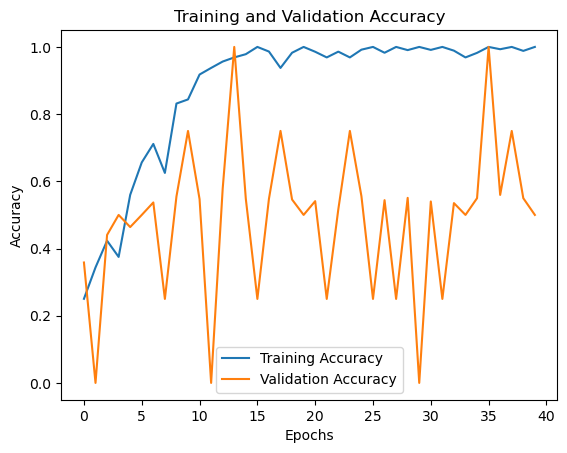

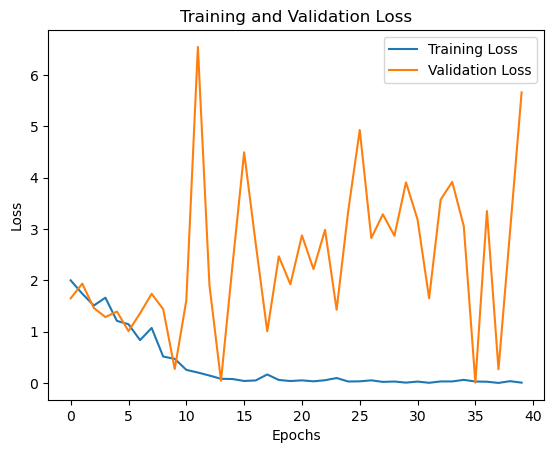

In [95]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step


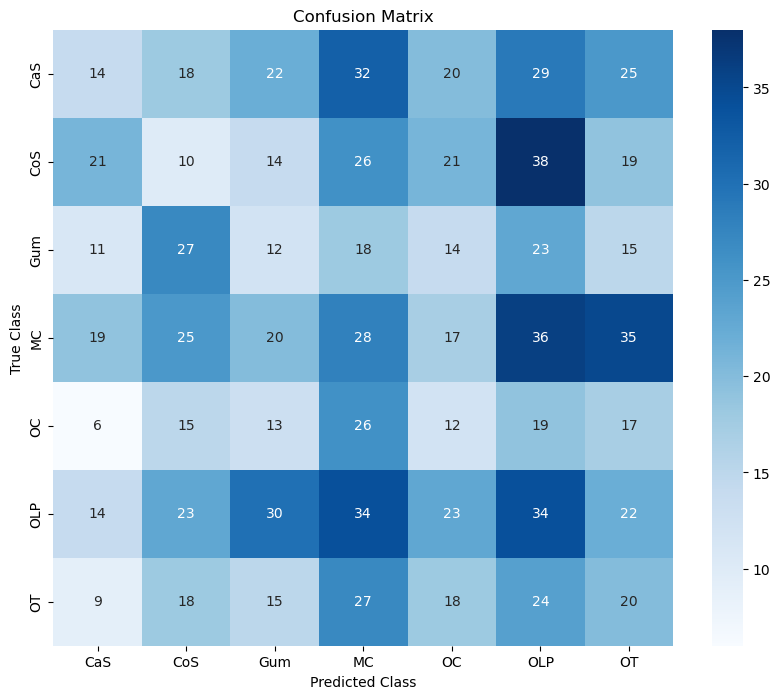

In [105]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Predict on the test set
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Get predicted class indices
predicted_class_indices = np.argmax(predictions, axis=1)

# Get true class indices (from the test generator)
true_class_indices = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_class_indices, predicted_class_indices)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


In [87]:
# Define ImageDataGenerator for test data (with rescaling)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load test data
test_generator = test_datagen.flow_from_directory(
    'Teeth Data one/Teeth DataSet/Teeth_Dataset/Testing',  # Path to your test data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Found 1028 images belonging to 7 classes.
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 295ms/step - accuracy: 0.5485 - loss: 3.0639
Test Loss: 3.1083478927612305
Test Accuracy: 0.537109375


In [89]:
# Predict on a batch of images (from test data)
predictions = model.predict(test_generator, steps=test_generator.samples // batch_size)

# Get the predicted class index
predicted_class_indices = np.argmax(predictions, axis=1)

# Map predicted indices to class names
predicted_class_names = [class_names[i] for i in predicted_class_indices]

# Example: Print the predicted class names for the first batch of test images
for i in range(len(predicted_class_names)):
    print(f"Image {i}: Predicted Class: {predicted_class_names[i]}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step
Image 0: Predicted Class: CoS
Image 1: Predicted Class: CoS
Image 2: Predicted Class: OLP
Image 3: Predicted Class: MC
Image 4: Predicted Class: OC
Image 5: Predicted Class: OT
Image 6: Predicted Class: Gum
Image 7: Predicted Class: MC
Image 8: Predicted Class: Gum
Image 9: Predicted Class: OLP
Image 10: Predicted Class: OLP
Image 11: Predicted Class: Gum
Image 12: Predicted Class: OT
Image 13: Predicted Class: MC
Image 14: Predicted Class: CaS
Image 15: Predicted Class: OLP
Image 16: Predicted Class: OC
Image 17: Predicted Class: CoS
Image 18: Predicted Class: CoS
Image 19: Predicted Class: CoS
Image 20: Predicted Class: CoS
Image 21: Predicted Class: MC
Image 22: Predicted Class: OT
Image 23: Predicted Class: MC
Image 24: Predicted Class: Gum
Image 25: Predicted Class: CoS
Image 26: Predicted Class: CoS
Image 27: Predicted Class: CaS
Image 28: Predicted Class: CaS
Image 29: Predicted Class: MC
Image 30: Predicted Class: CoS
Image 31: Predicted

In [93]:
# Save the model in HDF5 format
model.save('Teeth_Classification.keras')  # Save as .h5 file
